In [167]:
import pickle
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from sklearn.neural_network import MLPClassifier
from PIL import Image
import seaborn as sns
import cv2
import matplotlib.image as mpimg 

# Just to make sure all the out puts get printed in individual jupyter cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [178]:
randomList = [ random.randint(0, len(x)) for i in range(25)]

In [169]:
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv('desc.csv', index_col=0)


data['master_bath'] = data['bath'].apply(lambda x : int((10 * x % 10)) ) 
#data['bath'] =  data['bath'].apply(lambda x : int(x) ) 

for i in range(5) :
    data[str(i) + '_master_bath'] = data['master_bath'].apply(lambda x : 1 if int(x) == i else 0)



data['0_bath'] = data['bath'].apply(lambda x : 1 if int(x) == 0 else 0)
data['1_bath'] = data['bath'].apply(lambda x : 1 if int(x) == 1 else 0)
data['2_bath'] = data['bath'].apply(lambda x : 1 if int(x) == 2 else 0)
data['3_bath'] = data['bath'].apply(lambda x : 1 if int(x) == 3 else 0)
data['4_bath'] = data['bath'].apply(lambda x : 1 if int(x) == 4 else 0)
data['5_bath'] = data['bath'].apply(lambda x : 1 if int(x) == 5 else 0)
data['6_bath'] = data['bath'].apply(lambda x : 1 if int(x) == 6 else 0)
data['7_bath'] = data['bath'].apply(lambda x : 1 if int(x) == 7 else 0)
data['8_bath'] = data['bath'].apply(lambda x : 1 if int(x) == 8 else 0)
data['11_bath'] = data['bath'].apply(lambda x : 1 if int(x) == 11 else 0)
data['13_bath'] = data['bath'].apply(lambda x : 1 if int(x) == 13 else 0)
data['36_bath'] = data['bath'].apply(lambda x : 1 if int(x) == 36 else 0)



for i in range(1, 13) :
    data[str(i) + '_bed'] = data['bed'].apply(lambda x : 1 if int(x) == i else 0)




data = data.drop(['bed', 'bath'], axis=1)
data.describe()
#data[13150:13154]

scaler = MinMaxScaler() 
new_data = data.drop(['city', 'street'], axis=1)
col_list = new_data.columns.tolist()
new_data = scaler.fit_transform(new_data)
new_data = pd.DataFrame(new_data, columns=col_list)
new_data[7:21]


data
x = new_data.drop(['price'], axis=1)
y = data['price']
x,y



,n_city,sqft,price,master_bath,0_master_bath,1_master_bath,2_master_bath,3_master_bath,4_master_bath,0_bath,...,3_bed,4_bed,5_bed,6_bed,7_bed,8_bed,9_bed,10_bed,11_bed,12_bed
count,15474.000000,15474.000000,1.547400e+04,15474.000000,15474.000000,15474.000000,15474.000000,15474.000000,15474.000000,15474.000000,...,15474.000000,15474.000000,15474.000000,15474.000000,15474.000000,15474.000000,15474.000000,15474.000000,15474.000000,15474.000000
mean,216.597518,2173.913209,7.031209e+05,0.311878,0.696006,0.296627,0.006915,0.000388,0.000065,0.000775,...,0.383934,0.326160,0.118328,0.022554,0.004911,0.001228,0.000194,0.000388,0.000065,0.000065
std,112.372985,1025.339617,3.769762e+05,0.481203,0.459995,0.456785,0.082870,0.019688,0.008039,0.027838,...,0.486358,0.468822,0.323006,0.148481,0.069912,0.035021,0.013923,0.019688,0.008039,0.008039
min,0.000000,280.000000,1.950000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,119.000000,1426.000000,4.450000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,222.500000,1951.000000,6.390000e+05,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,315.000000,2737.750000,8.349750e+05,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,414.000000,17667.000000,2.000000e+06,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,n_city,sqft,price,master_bath,0_master_bath,1_master_bath,2_master_bath,3_master_bath,4_master_bath,0_bath,...,3_bed,4_bed,5_bed,6_bed,7_bed,8_bed,9_bed,10_bed,11_bed,12_bed
7,0.115942,0.133433,0.193906,0.25,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.115942,0.133433,0.193906,0.25,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.765700,0.210042,0.274238,0.25,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.311594,0.216484,0.639889,0.25,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.294686,0.343187,0.722438,0.25,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.753623,0.125726,0.716343,0.00,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.396135,0.138379,0.443213,0.00,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.753623,0.044171,1.000000,0.00,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.294686,0.343187,0.722438,0.25,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.294686,0.248289,0.750693,0.25,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,street,city,n_city,sqft,price,master_bath,0_master_bath,1_master_bath,2_master_bath,3_master_bath,...,3_bed,4_bed,5_bed,6_bed,7_bed,8_bed,9_bed,10_bed,11_bed,12_bed
image_id,,,,,,,,,,,,,,,,,,,,,
0,1317 Van Buren Avenue,"Salton City, CA",317,1560,201900,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,124 C Street W,"Brawley, CA",48,713,228500,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2304 Clark Road,"Imperial, CA",152,800,273950,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,755 Brawley Avenue,"Brawley, CA",48,1082,350000,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2207 R Carrillo Court,"Calexico, CA",55,2547,385100,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15469,4156 Sterlingview Drive,"Moorpark, CA",227,4092,949000,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
15470,4355 Avenida Prado,"Thousand Oaks, CA",372,2773,949900,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
15471,12717 Koenigstein Rd Road,"Santa Paula, CA",338,1576,920000,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


(         n_city      sqft  master_bath  0_master_bath  1_master_bath  \
 0      0.765700  0.073618         0.00            1.0            0.0   
 1      0.115942  0.024904         0.00            1.0            0.0   
 2      0.367150  0.029907         0.00            1.0            0.0   
 3      0.115942  0.046126         0.00            1.0            0.0   
 4      0.132850  0.130385         0.00            1.0            0.0   
 ...         ...       ...          ...            ...            ...   
 15469  0.548309  0.219244         0.25            0.0            1.0   
 15470  0.898551  0.143383         0.00            1.0            0.0   
 15471  0.816425  0.074538         0.00            1.0            0.0   
 15472  0.611111  0.103871         0.00            1.0            0.0   
 15473  0.630435  0.053833         0.00            1.0            0.0   
 
        2_master_bath  3_master_bath  4_master_bath  0_bath  1_bath  ...  \
 0                0.0            0.0          

<AxesSubplot:>

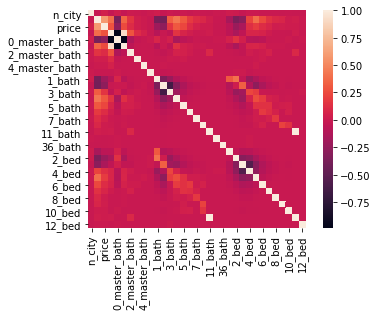

In [170]:
sns.heatmap(new_data.corr(), square=True, )

Epoch 1/30
774/774 [==============================] - 1s 1ms/step - loss: 565760.0625 - accuracy: 0.0000e+00 - val_loss: 411182.7188 - val_accuracy: 0.0000e+00
Epoch 2/30
774/774 [==============================] - 1s 902us/step - loss: 262024.8594 - accuracy: 0.0000e+00 - val_loss: 247589.3906 - val_accuracy: 0.0000e+00
Epoch 3/30
774/774 [==============================] - 1s 888us/step - loss: 242544.3750 - accuracy: 0.0000e+00 - val_loss: 238003.5781 - val_accuracy: 0.0000e+00
Epoch 4/30
774/774 [==============================] - 1s 787us/step - loss: 236928.7969 - accuracy: 0.0000e+00 - val_loss: 237448.3750 - val_accuracy: 0.0000e+00
Epoch 5/30
774/774 [==============================] - 1s 889us/step - loss: 234307.0312 - accuracy: 0.0000e+00 - val_loss: 237282.0156 - val_accuracy: 0.0000e+00
Epoch 6/30
774/774 [==============================] - 1s 816us/step - loss: 232552.3281 - accuracy: 0.0000e+00 - val_loss: 236150.8750 - val_accuracy: 0.0000e+00
Epoch 7/30
774/774 [==========

Text(0.5, 1.0, 'train & loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Normalized Error')

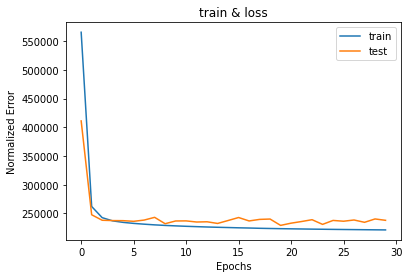

In [263]:
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(tf.keras.layers.Dense(6, input_shape=(32,), activation='relu' ))
model.add(tf.keras.layers.Dense(12, activation='relu' ))
model.add(tf.keras.layers.Dense(1, activation='linear' ))

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mae', optimizer=opt, metrics=['accuracy'])

history = model.fit(x, y, validation_split=0.2, epochs=30, batch_size=16)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('train & loss')
plt.xlabel('Epochs')
plt.ylabel('Normalized Error')
plt.legend(['train', 'test'])

<Figure size 1224x1008 with 0 Axes>

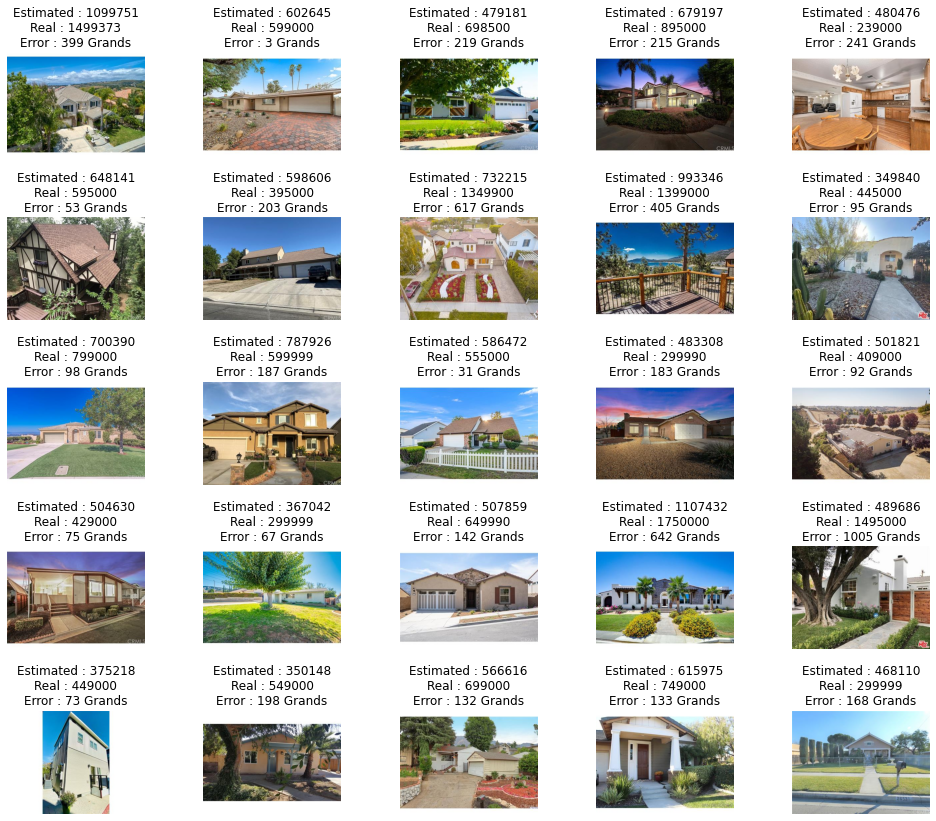

In [264]:
import matplotlib.gridspec as gridspec
#v1 final loss = 221479 / 236307

plt.figure(figsize = (17,14)) # 10 10
grid = gridspec.GridSpec(5,5) # 2 2
grid.update(wspace=0.2, hspace=0.6)  # 0.1 0.1

for i in range(25): #4
    img_plt = plt.subplot(grid[i])
    rand = random.randint(0, len(x))
    visualize(randomList[i]) #+ 10)
    

plt.show()

In [172]:
def visualize(j) : 
    
    d = x.loc[j]


    p = data['price'].loc[j]
    d = np.array(d).reshape(32)
    d = np.array( [list(d)] )
    q = model.predict(d)
    est = int(q[0][0])

    pic = mpimg.imread('pics/' + str(j) + '.jpg')
    plt.axis('off')
    plt.title('Estimated : ' + str(est) + '\nReal : ' + str(p) + '\nError : ' + str( abs( est - p )//1000 ) + ' Grands')
    plt.imshow(pic) 
